# Lab Instructions

Find a dataset that interests you. I'd recommend starting on [Kaggle](https://www.kaggle.com/). Read through all of the material about the dataset and download a .CSV file.

1. Write a short summary of the data.  Where did it come from?  How was it collected?  What are the features in the data?  Why is this dataset interesting to you?  

2. Identify 5 interesting questions about your data that you can answer using Pandas methods.  

3. Answer those questions!  You may use any method you want (including LLMs) to help you write your code; however, you should use Pandas to find the answers.  LLMs will not always write code in this way without specific instruction.  

4. Write the answer to your question in a text box underneath the code you used to calculate the answer.



STUDENT ANSWERS and CODE

# Lab 1.5 — Getting Started with Python and Pandas

**Name:** Andy Kilgore  
**Dataset:** Netflix Movies and TV Shows  
**Source:** Kaggle (https://www.kaggle.com/datasets/shivamb/netflix-shows)

---


The dataset comes from Kaggles Netflix Movies and TV Shows collection. It was scraped from Netflix and includes information about movies and TV shows available on the platform as of 2021.  

This Data set has the following info and variables 
- `show_id`: unique identifier  
- `type`: Movie or TV Show  
- `title`: title of the show  
- `director`: director(s) if available  
- `cast`: main actors  
- `country`: country of production  
- `date_added`: when it was added to Netflix  
- `release_year`: year of release  
- `rating`: TV rating (e.g., TV-MA, PG-13)  
- `duration`: length (minutes or seasons)  
- `listed_in`: genre(s)  
- `description`: short summary  

I chose this because I watch Netflix often, so this dataset was interesting because it shows what content they provide, where it comes from, and how it has changed over time.


Lets go ahead and load up the data set ! 

In [3]:
import pandas as pd

# load CSV  
df = pd.read_csv("netflix_titles.csv")

print("Shape:", df.shape) # make sure it loaded and grab some info
df.info()
df.head(3) #grab 3 


Shape: (8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


What are five questions I came up with? 

1. What percentage of the titles are Movies vs TV Shows?  
2. Which country has the most titles in the dataset?  
3. What are the top 10 directors with the most works on Netflix?  
4. How many titles were added each year?  
5. What are the most common genres on Netflix?  


Q1 What percentage of the titles are Movies vs TV Shows?


<Axes: title={'center': 'Movies vs TV Shows'}>

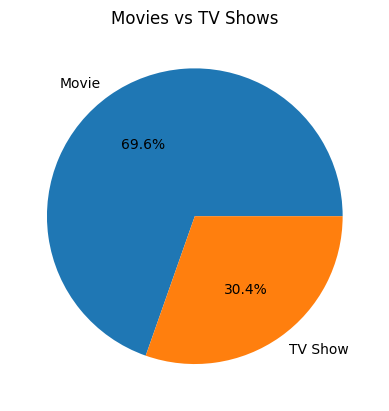

In [23]:
type_counts = df['type'].value_counts(normalize=True) * 100
type_counts.plot(kind='pie', autopct='%1.1f%%', ylabel='', title="Movies vs TV Shows")



A1 About 69% of the data are Movies

Q2 Which country has the most titles in the dataset? 

<Axes: title={'center': 'Top 10 Countries with Most Titles'}, xlabel='Country', ylabel='Number of Titles'>

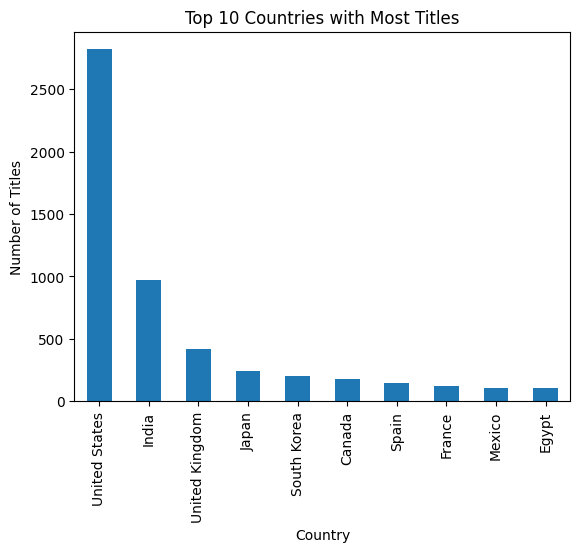

In [24]:
country_counts = df['country'].value_counts().head(10)
country_counts.plot(kind='bar', title="Top 10 Countries with Most Titles", ylabel="Number of Titles", xlabel="Country")



A2: The United States has the most titles. 

Q3 What are the top 10 directors with the most works on Netflix?


<Axes: title={'center': 'Top 10 Directors on Netflix'}, xlabel='Number of Titles', ylabel='Director'>

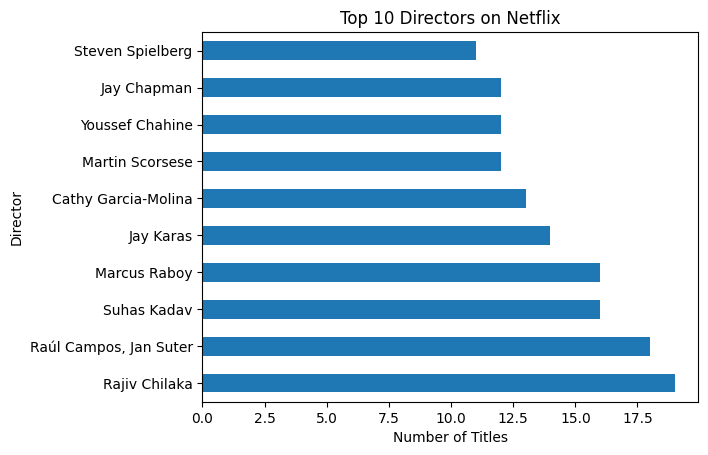

In [32]:
directors = df['director'].value_counts().head(10)
directors.plot(kind='barh', title="Top 10 Directors on Netflix", xlabel="Number of Titles", ylabel="Director")



A3: Rajiv Chilaka was the director with the most items. (The year data was gathered) 

Q4 How many titles were added each year?

<Axes: title={'center': 'Titles Added per Year'}, xlabel='Year', ylabel='Number of Titles'>

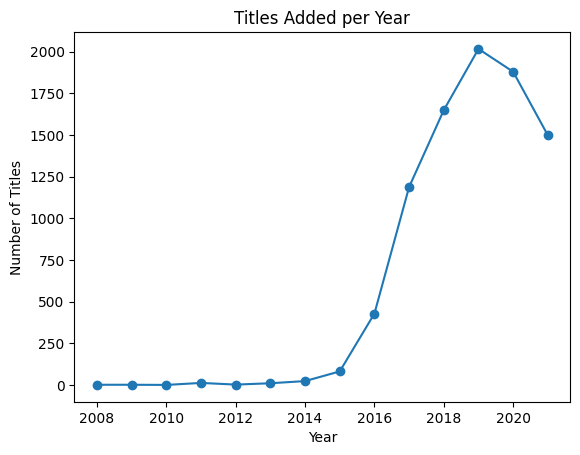

In [28]:
# sigh there is spaces and we need to clean it up before we parse 
df['date_added'] = pd.to_datetime(
    df['date_added'].astype(str).str.strip(),   # kill spaces
    errors='coerce',                             # bhandle null data
    format='mixed'                               # let pandas decide the value. 
)

# Pull year and count per year
df['year_added'] = df['date_added'].dt.year

titles_per_year = (
    df['year_added']
      .dropna()
      .astype(int)
      .value_counts()
      .sort_index()
)

titles_per_year
titles_per_year.plot(kind='line', marker='o', title="Titles Added per Year", ylabel="Number of Titles", xlabel="Year")

A4: The number of titles added rose greatly from 2015–2019 with the highest being around  2019 but then dropped in 2020.


Q5: What are the most common genres on Netflix?

<Axes: title={'center': 'Top 10 Genres on Netflix'}, xlabel='Genre', ylabel='Number of Titles'>

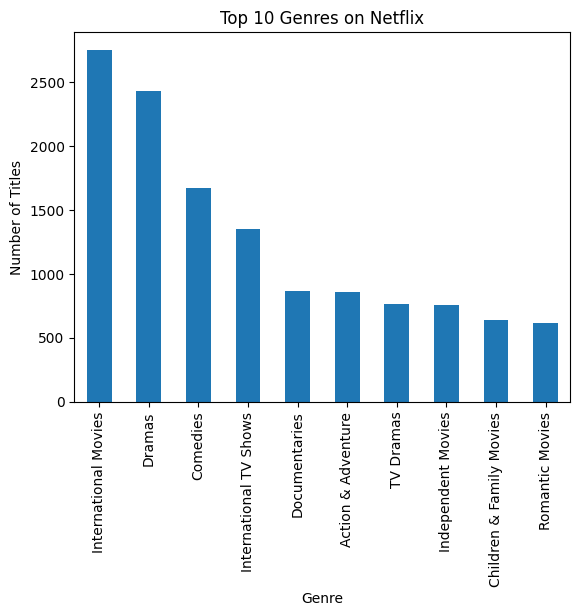

In [31]:
genres = df['listed_in'].str.split(',').explode().str.strip()
top_genres = genres.value_counts().head(10)
top_genres
top_genres.plot(kind='bar', title="Top 10 Genres on Netflix", ylabel="Number of Titles", xlabel="Genre")

A5  International Movies and Dramas, and Comedies seem to be the most common!
